In [1]:
import pandas as pd
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim_models as gensimvis  
from gensim.models.ldamulticore import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 
import matplotlib.gridspec as gridspec
import math

/Users/conneryurkon/miniconda3/envs/cs8803dsn/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df = pd.read_excel('final_cleaned_data.xlsx', index_col=0)
df[['C1', 'C2', 'C3']] = df[['C1', 'C2', 'C3']].astype(str)
df.head()

,C1,C2,C3,A1,A2,A3,ID,Link,C1_link,C2_link,C3_link
0,>anti-punctuationwhy should i care about punct...,Ah… I get it now. You’re still too young… have...,i have two PhDs dumb ass,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN
1,Ah… I get it now. You’re still too young… have...,i have two PhDs dumb ass,One in Anti-punctuation; the other in Palindro...,DedsecEric,killer0214,DedsecEric,wtjgdk,0,NaN,NaN,NaN
2,i have two PhDs dumb ass,One in Anti-punctuation; the other in Palindro...,no biology and chemistry,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN
3,One in Anti-punctuation; the other in Palindro...,no biology and chemistry,"Apparently, no English either.",DedsecEric,killer0214,DedsecEric,wtjgdk,0,NaN,NaN,NaN
4,no biology and chemistry,"Apparently, no English either.",im working on one in psychology and English,killer0214,DedsecEric,killer0214,wtjgdk,0,NaN,NaN,NaN


In [3]:
df.shape

(12739, 11)

In [4]:
df['agg'] = df[['C1', 'C2', 'C3']].agg(' '.join, axis=1)
df['agg'].iloc[2]

'i have two PhDs dumb ass One in Anti-punctuation; the other in Palindromes? We’ll call you Dr. Awkward. no biology and chemistry'

In [5]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/conneryurkon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['agg'] = df['agg'].apply(simple_preprocess)
df['agg'] = df['agg'].apply(lambda x: [word for word in x if word not in stopwords])
df['agg'].iloc[0]

['anti',
 'punctuationwhy',
 'care',
 'punctuation',
 'internet',
 'one',
 'cares',
 'care',
 'fucking',
 'school',
 'ah',
 'get',
 'still',
 'young',
 'period',
 'yet',
 'two',
 'phds',
 'dumb',
 'ass']

In [7]:
dictionary = Dictionary(df['agg'])
dictionary.token2id

{'ah': 0,
 'anti': 1,
 'ass': 2,
 'care': 3,
 'cares': 4,
 'dumb': 5,
 'fucking': 6,
 'get': 7,
 'internet': 8,
 'one': 9,
 'period': 10,
 'phds': 11,
 'punctuation': 12,
 'punctuationwhy': 13,
 'school': 14,
 'still': 15,
 'two': 16,
 'yet': 17,
 'young': 18,
 'awkward': 19,
 'call': 20,
 'dr': 21,
 'palindromes': 22,
 'biology': 23,
 'chemistry': 24,
 'apparently': 25,
 'either': 26,
 'english': 27,
 'im': 28,
 'psychology': 29,
 'working': 30,
 'actually': 31,
 'amount': 32,
 'apart': 33,
 'banner': 34,
 'bruce': 35,
 'bruh': 36,
 'comment': 37,
 'degrees': 38,
 'depending': 39,
 'even': 40,
 'expert': 41,
 'far': 42,
 'fields': 43,
 'going': 44,
 'high': 45,
 'human': 46,
 'insane': 47,
 'level': 48,
 'like': 49,
 'made': 50,
 'mean': 51,
 'much': 52,
 'multiple': 53,
 'offhand': 54,
 'people': 55,
 'phd': 56,
 'plausible': 57,
 'research': 58,
 'specialization': 59,
 'takes': 60,
 'well': 61,
 'bad': 62,
 'brethren': 63,
 'clan': 64,
 'feel': 65,
 'fuck': 66,
 'also': 67,
 'amab':

In [8]:
corpus = [dictionary.doc2bow(text) for text in df['agg']]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1)]

In [15]:
perplexities = []
coherences = []

for num_topics in range(3, 16):
    lda_model = LdaModel(
        corpus=corpus,
        num_topics=num_topics,
        id2word=dictionary
    )
    perplexities.append(lda_model.log_perplexity(corpus))
    coherence_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherences.append(coherence_model.get_coherence())

Text(0.5, 1.0, 'Number of Topics vs. Coherence Score')

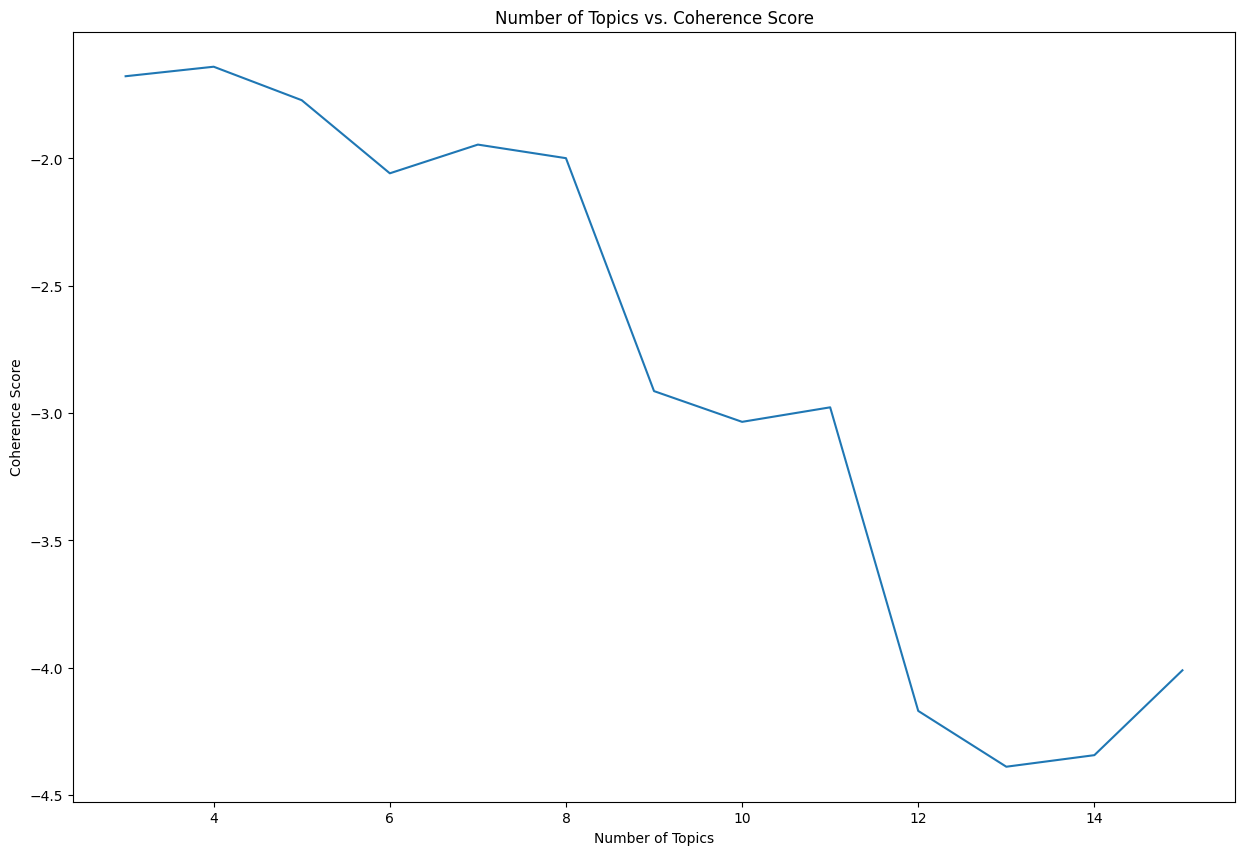

In [16]:
# higher is better

plt.figure(figsize=(15, 10))
plt.plot(range(3, 16), coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Number of Topics vs. Coherence Score")

Text(0.5, 1.0, 'Number of Topics vs. Log Perplexity')

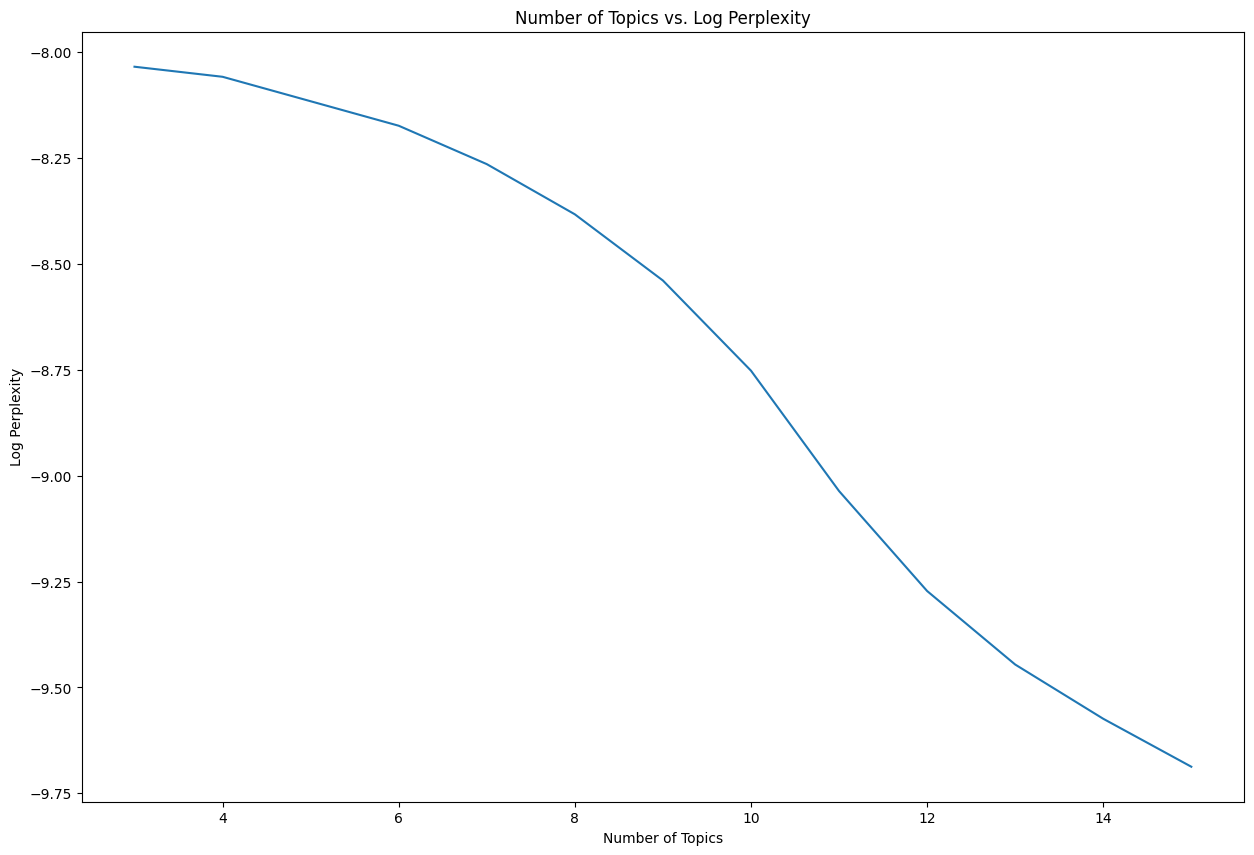

In [17]:
# lower is better

plt.figure(figsize=(15, 10))
plt.plot(range(3, 16), perplexities)
plt.xlabel("Number of Topics")
plt.ylabel("Log Perplexity")
plt.title("Number of Topics vs. Log Perplexity")

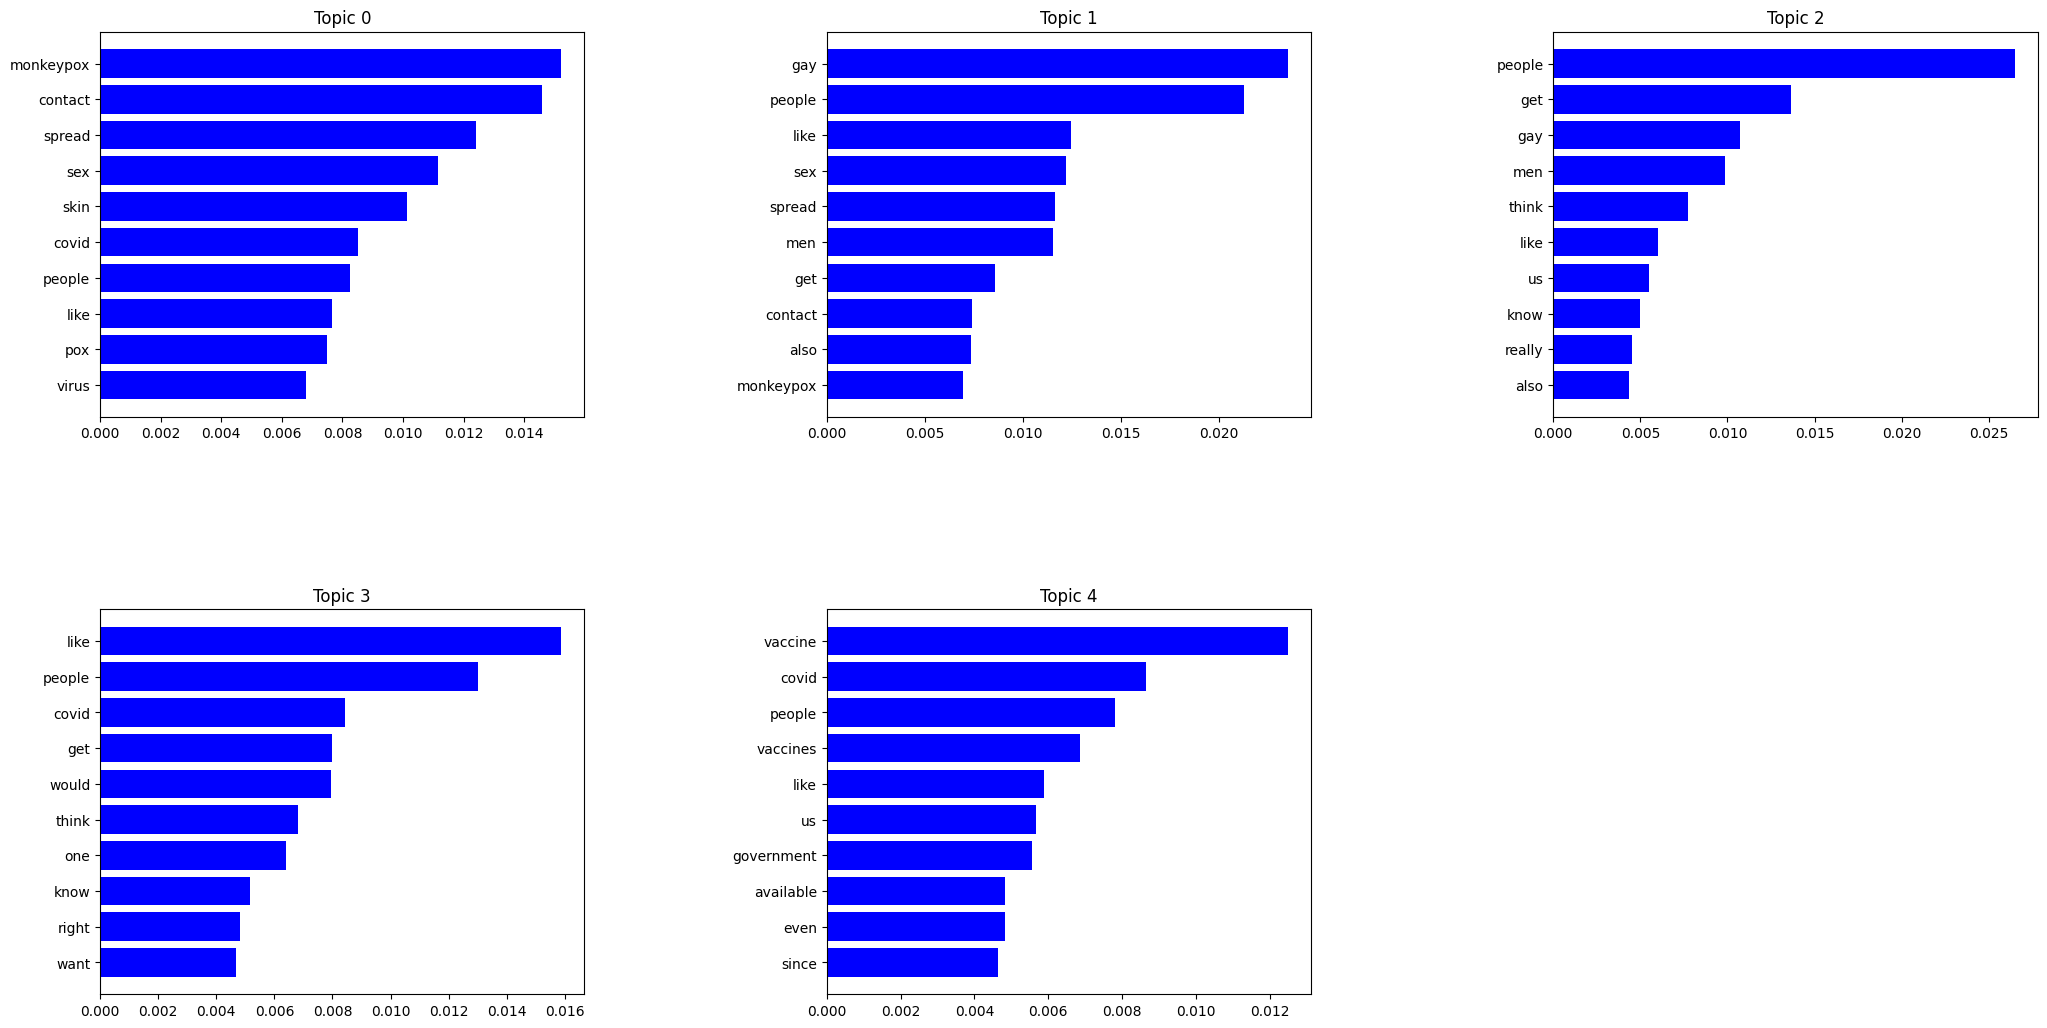

In [18]:
NUM_TOPICS = 5
lda_model = LdaModel(
        corpus=corpus,
        num_topics=NUM_TOPICS,
        id2word=dictionary
)

def plot_top_words(lda=lda_model, nb_topics=NUM_TOPICS, nb_words=10):
    top_words = [[word for word, _ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _, beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(NUM_TOPICS)) + 1, round(math.sqrt(NUM_TOPICS)) + 1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(25, 20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center', color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic " + str(i))
        
plot_top_words(lda=lda_model)

In [19]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/Users/conneryurkon/miniconda3/envs/cs8803dsn/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.096275 -0.000211       1        1  24.494339
3     -0.057398 -0.031218       2        1  23.888616
0      0.081032  0.078921       3        1  21.886988
2      0.013632 -0.098584       4        1  15.346936
4     -0.133542  0.051091       5        1  14.383121, topic_info=           Term         Freq        Total Category  logprob  loglift
171         gay  5656.000000  5656.000000  Default  30.0000  30.0000
1069    contact  3516.000000  3516.000000  Default  29.0000  29.0000
174         men  3522.000000  3522.000000  Default  28.0000  28.0000
533      spread  4145.000000  4145.000000  Default  27.0000  27.0000
817        skin  1833.000000  1833.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
7           get   400.565577  5264.921676   Topic5  -5.4864  -0.6368
210       would   359.858958  3590.247316   Topic5  -5.5935  -0.3611
177         pox   335.854352  2434.742174   Topic5  -5.6626  -0.0418
730   monkeypox   349.136563  4341.292373   Topic5  -5.6238  -0.5813
9           one   310.622180  3274.479644   Topic5  -5.7407  -0.4162

[456 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4168      2  0.962766  abortion
9848      1  0.979744  accident
1127      1  0.018678    addict
1127      2  0.028018    addict
1127      3  0.943262    addict
...     ...       ...       ...
466       3  0.268956     years
466       4  0.062007     years
466       5  0.282132     years
1656      2  0.011558    zombie
1656      3  0.970914    zombie

[1151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

In [20]:
lda_model.print_topics()

[(0,
  '0.015*"monkeypox" + 0.015*"contact" + 0.012*"spread" + 0.011*"sex" + 0.010*"skin" + 0.009*"covid" + 0.008*"people" + 0.008*"like" + 0.007*"pox" + 0.007*"virus"'),
 (1,
  '0.024*"gay" + 0.021*"people" + 0.012*"like" + 0.012*"sex" + 0.012*"spread" + 0.012*"men" + 0.009*"get" + 0.007*"contact" + 0.007*"also" + 0.007*"monkeypox"'),
 (2,
  '0.026*"people" + 0.014*"get" + 0.011*"gay" + 0.010*"men" + 0.008*"think" + 0.006*"like" + 0.006*"us" + 0.005*"know" + 0.005*"really" + 0.004*"also"'),
 (3,
  '0.016*"like" + 0.013*"people" + 0.008*"covid" + 0.008*"get" + 0.008*"would" + 0.007*"think" + 0.006*"one" + 0.005*"know" + 0.005*"right" + 0.005*"want"'),
 (4,
  '0.012*"vaccine" + 0.009*"covid" + 0.008*"people" + 0.007*"vaccines" + 0.006*"like" + 0.006*"us" + 0.006*"government" + 0.005*"available" + 0.005*"even" + 0.005*"since"')]